In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Лабораторная работа №4 по вычислительной математике
## Применение полиномов Лагранжа, Ньютона и сплайн-интерполяция
### Выполнил Филиппенко Павел -- студент группы Б01-009

### Постановка задачи
У нас имеются данные о населении в США в период с 1910 по 2000 год. Необходимо построить интерполяционный полином для данного набора точек и получить значение в 2010 году.

In [58]:
year = np.array(range(1910, 2000+1, 10))
population = np.array([
    92228496, 106021537, 123202624, 132164569, 
    151325798, 179323175, 203211926,
    226545805, 248709873, 281421906
])
target_year = 2010.0

Text(0, 0.5, 'Население')

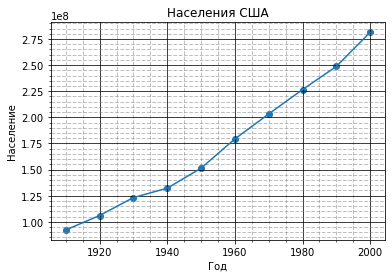

In [59]:
plt.plot(year, population)
plt.scatter(year, population)

plt.minorticks_on()
plt.grid(which = 'major', color = 'black', linewidth = 1, linestyle = '-', alpha = 0.75)
plt.grid(which = 'minor', color = 'grey', linewidth = 1, linestyle = '--', alpha = 0.5)

plt.title('Населения США')
plt.xlabel('Год')
plt.ylabel('Население')

В первой части работы мы будем использовать интерполяционный полином Ньютона. Для сетки $\{t_i\}_0^N$ данный полином строится следующим образом

$$N_n(t) = f(t_1) + f(t_1, t_2)(t - t_1) + f(t_1, t_2, t_3)(t - t_1)(t - t_2) + \dots$$

где $f(t_1, \dots, t_k)$ -- $k$-я разделенная разность.

Больше информации про разделенные разности вы можете прочитать в дополнительной литературе или 

In [60]:
# класс полинома
class NewtonPolynomial:
    def __init__(self, x, f):
        self.x = x
        self.f = f
        self.dim = np.shape(f)[0]

    # метод, строящий таблицу разделенный разностей
    def GetPolyCoefficient(self):
        coefficient = np.full((self.dim, self.dim), 0.0)
        # первый столбец коэффициентов -- значения функции в точках
        for i in range(self.dim):
            coefficient[0][i] = self.f[i]

        for i in range(self.dim-1):
            for j in range(self.dim-1-i):
                coefficient[i+1][j] = (coefficient[i][j+1] - coefficient[i][j]) / (self.x[j+i+1] - self.x[j])
            
        return coefficient
    
    # метод по сути задает функцию полинома F(w)
    # здесь w -- свободная переменная
    def GetPolinomial(self, w: float):
        poly = 1
        res = 0.0

        coefficient = self.GetPolyCoefficient()
        for i in range(self.dim):
            res += coefficient[i][0] * poly
            poly = poly * (w - self.x[i])

        return res

    def __repr__(self):
        pass

In [61]:
apprx_poly_n = NewtonPolynomial(year, population)

In [62]:
# выведем таблицу разделенных разностей, исползуя pandas

# df = pd.DataFrame(apprx_poly_n.GetPolyCoefficient()).T
# df.columns = [f'b{i}' for i in range(np.shape(population)[0])]
# print(df)

Approximated population in 2010 is 827906509


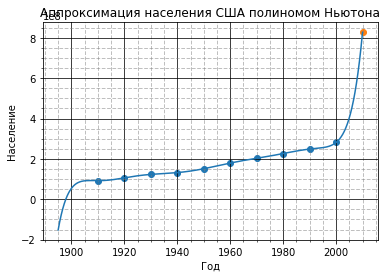

In [63]:
# задаем множество точек для построения графика полинома
year_dence = np.linspace(1895, 2010, 1000)
population_dence = np.array([apprx_poly_n.GetPolinomial(year) for year in year_dence])

plt.scatter(year, population)
plt.plot(year_dence, population_dence)
plt.scatter(2010, apprx_poly_n.GetPolinomial(2010.0))

plt.minorticks_on()
plt.grid(which = 'major', color = 'black', linewidth = 1, linestyle = '-', alpha = 0.75)
plt.grid(which = 'minor', color = 'grey', linewidth = 1, linestyle = '--', alpha = 0.5)

plt.title('Аппроксимация населения США полиномом Ньютона')
plt.xlabel('Год')
plt.ylabel('Население')

print('='*50)
print('Approximated population in %d is %d' %(target_year, apprx_poly_n.GetPolinomial(target_year)))
print('='*50)

Релизуем дополнительно интерполяционный полином Лагранжа

Интерполяционный полином лагранжа дла сетки $\{t_i\}_0^N$ строится следующим образом

$$L_N(x) = f_0 \frac{(x - x_1)(x - x_2) \dots (x - x_N)}{(x_0 - x_1)(x_0 - x_2) \dots (x_0 - x_N)} + f_1 \frac{(x - x_0)(x - x_2) \dots (x - x_N)}{(x_1 - x_0)(x_1 - x_2) \dots (x_1 - x_N)} + \dots + f_N \frac{(x - x_0)(x - x_1) \dots (x - x_{N-1})}{(x_N - x_0)(x_N - x_1) \dots (x_N - x_{N-1})}$$

In [64]:
class LagrangePolynomial:
  def __init__(self, x, y):
    self.x = x
    self.y = y
    assert np.shape(x)[0] == np.shape(y)[0]
    self.dim = np.shape(x)[0]

  def __GetBasePart(self, w: float, i: int):
    base = 1
    for j in range(self.dim):
      if j != i:
        base = base * (w - self.x[j])
    return base

  def GetPolinomial(self, w: float):
    P = 0
    for i in range(self.dim):
      P += self.y[i] * self.__GetBasePart(w, i) / self.__GetBasePart(self.x[i], i)
    return P

Approximated population in 2010 is 827906509


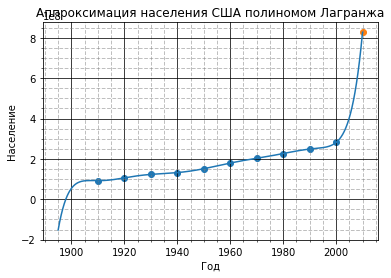

In [65]:
apprx_poly_l = LagrangePolynomial(year, population)

year_dence = np.linspace(1895, 2010, 1000)
population_dence = np.array([apprx_poly_l.GetPolinomial(year) for year in year_dence])

plt.scatter(year, population)
plt.plot(year_dence, population_dence)
plt.scatter(2010, apprx_poly_l.GetPolinomial(2010.0))

plt.minorticks_on()
plt.grid(which = 'major', color = 'black', linewidth = 1, linestyle = '-', alpha = 0.75)
plt.grid(which = 'minor', color = 'grey', linewidth = 1, linestyle = '--', alpha = 0.5)

plt.title('Аппроксимация населения США полиномом Лагранжа')
plt.xlabel('Год')
plt.ylabel('Население')

print('='*50)
print('Approximated population in %d is %d' %(target_year, apprx_poly_l.GetPolinomial(target_year)))
print('='*50)

Очевидно, что интерполяционные полиномы, полученные методами Ньютона и Лагранжа есть один и тот же полином.

## Вывод
Как мы видим, в заданной области $[1910, 2000]$ полином Ньютона довольно неплохо аппроксимирует заданные точки. Условия интерполяции ($N(x_i) = f(x_i) = f_i$) выполнены. Однако, предсказание населения в 2010 году дает просто сказочные результаты. Кроме того, в области $(-\infty, 1995)$ график уходит в отрицательные значения, что так же не может не настораживать.

Как мы знаем, ошибку интерполяции можно записать следующим образом

$$|N(t) - f(t)| = R_N(t) = \frac{f^{N+1}(\xi)}{(N+1)!} \prod \limits_{k=0}^N (t-t_k)$$

Отсюда можно заключить следующее:

$$t \in [t_N, t_N + \tau] ⇒ |R_N(t)| \leq \tau^{N+1} \max |f^{(N+1)}(\xi)|$$
$$t \in [t_N + \tau, t_N + 2\tau] ⇒ |R_N(t)| \leq (N+2)\tau^{N+1} \max |f^{(N+1)}(\xi)|$$
$$t \in [t_N + 2\tau, t_N + 3\tau] ⇒ |R_N(t)| \leq \frac{(N+2)(N+3)}{2!} \tau^{N+1} \max |f^{(N+1)}(\xi)|$$
$$\dots$$

Таким образом, можно заключить, что при использовании интерполяционных полиномов и равномерной сетки, экстраполяция дает адекватные значения только при малом удалении от заданного промежутка.

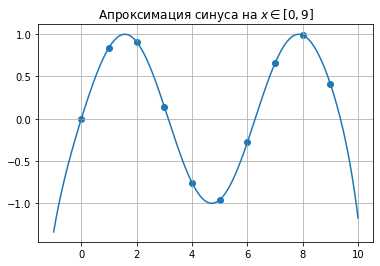

In [66]:
# пример аппроксимации простой функции полиномами Ньютона
x = np.array(range(0, 10))
y = np.sin(x)

x_dence = np.linspace(min(x)-1, max(x)+1, 1000)

apprx_poly_n = NewtonPolynomial(x, y)

plt.scatter(x, y)
plt.plot(x_dence, apprx_poly_n.GetPolinomial(x_dence))
plt.title(r'Апроксимация синуса на $x \in [0, 9]$')
plt.grid()

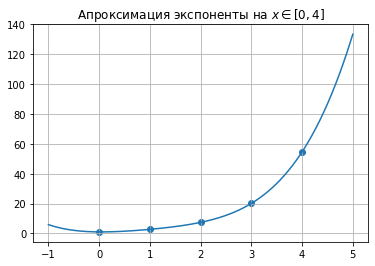

In [67]:
# пример аппроксимации простой функции полиномами Лагранжа
x = np.array(range(0, 5))
y = np.exp(x)

x_dence = np.linspace(min(x)-1, max(x)+1, 1000)

apprx_poly_l = LagrangePolynomial(x, y)

plt.scatter(x, y)
plt.plot(x_dence, apprx_poly_l.GetPolinomial(x_dence))
plt.title(r'Апроксимация экспоненты на $x \in [0, 4]$')
plt.grid()

Во второй части задания, мы будем использовать сплайн-итерполяцию.

Заданный промежуток $[x_0, x_n]$ мы делим сеткой на много более маленьких промежутков $[x_{i-1}, x_i]$ и каждый из них приближаем кубическим сплайном

$$S(x) = a_i + b_i (x - x_i) + c_i (x - x_i)^2 + d_i (x - x_i)^3$$

Принципиальное отличие данного метода от метода интерполяционных полиномов заключается в том, что теперь мы учитываем значения производных на концах отрезков.

$$S(x_i) = a_i ~~ S'(x_i) = b_i ~~ S''(x_i) = c_i ~~ S'''(x_i) = d_i$$

Условия непрерывности всех производных до второго порядка включительно можно записать следующим образом

$$S_i(x_i) = S_{i-1}(x_i)$$
$$S_i'(x_i) = S_{i-1}'(x_i)$$
$$S_i''(x_i) = S_{i-1}''(x_i)$$

Заметим, что $S_i(x_i) = f(x_i) = f_i$. Обозначим $h_i = x_i - x_{i-1}$. Тогда из полученных условий можно получить формулы для коэффициентов кубического сплайна

$$a_i = f_i$$
$$d_i = \frac{c_i - c_{i-1}}{3 h_i}$$
$$b_i = \frac{a_i - a_{i-1}}{h_i} + \frac{2 c_i + c_{i-1}}{3} h_i$$

тогда для $c_i$ можно записать следующую рекурентную формулу

$$c_{i-1} h_i + 2 c_i (h_i + h_{i+1}) + c_{i+1} h_{i+1} = 3 \left(\frac{a_{i+1} - a_i}{h_{i+1}} - \frac{a_i - a_{i-1}}{h_i} \right)$$

Причем $c_0 = c_N = 0$

Выпишим явно эту систему уравнений на $c_i$, обозначим

$$3 \left(\frac{a_{i+1} - a_i}{h_{i+1}} - \frac{a_i - a_{i-1}}{h_i} \right) = F_i$$

$$
\begin{cases}
2 c_1 (h_1 + h_2) + c_2 h_2 = F_1 \\
c_1 h_2 + 2 c_2 (h_2 + h_3) + c_3 h_3 = F_2 \\
c_2 h_3 + 2 c_3 (h_3 + h_4) + c_4 h_4 = F_3 \\
… \\
c_{n-2} h_{n-1} + 2 c_{n-1} (h_{n-1} + h_n) = F_{n-1}
\end{cases}
$$

Далее заметим, что данную систему уравнений можно переписать в матричном виде

$$
A
\begin{pmatrix}
c_1 \\
c_2 \\
\dots \\
c_{n-1}
\end{pmatrix}
=
\begin{pmatrix}
F_1 \\
F_2 \\
\dots \\
F_{n-1}
\end{pmatrix}
$$

где $A$ -- трехдиогональная матрица с диогональными элементами $2 (h_i + h_{i+1})$

Таким образом, для решения данной системы и нахождения коэффициентов $c_i$ можем применить метод трехжиогональной прогонки.

## Метод трехдиагональной прогонки

Система уравнений

$$Ax = F$$

Равносильна соотношению

$$A_i x_{i-1} + B_i x_i + C_i x_{i+1} = F_i$$

Метод прогонки основывается на предположении, что искомые неизвестные связаны рекуррентным соотношением:

$$x_{i} = \alpha_{i+1} x_{i+1} + \beta_{i+1}$$

Тогда, можно записать следующие соотношения

$$
\begin{cases}
\alpha_{i+1} = \frac{-C_i}{A_i \alpha_i + B_i} \\ 
\beta_{i+1} = \frac{F_i - A_i \beta_i}{A_i \alpha_i + B_i}
\end{cases}
$$

Причем

$$
\alpha_2 = \frac{-C_1}{B_1} ~~ 
\beta_2 = \frac{F_1}{B_1}
$$

После нахождения прогоночных коэффициентов $\alpha$ и $\beta$, используя рекурентное соотношение, можем найти решение $x$ системы, причем

$$x_n = \frac{F_n - A_n \beta_n}{B_n + A_n \alpha_n}$$

In [68]:
# класс сплайна -- один кубический сплайн на одном промежутке (между двумя точками)
class Spline:
  def __init__(self, a, b, c, d, xi):
    self.a = a
    self.b = b
    self.c = c
    self.d = d
    self.xi = xi

  # функция, которая строит собственно полином (функцию) по коэффициентам сплайна
  def GetPolinomial(self, w: float):
    return self.a  + self.b * (w - self.xi) + self.c * (w - self.xi)**2 + self.d * (w - self.xi)**3
  
  # def __repr__(self):
  #   s = f'{self.a} + {self.b}(x - {self.xi}) + {self.c}(x - {self.xi})^2 + {self.d}(x - {self.xi})^3'
  #   return s

In [69]:
# набор сплайнов, покрывающий весь набор точек
class SplineSet:
  def __init__(self, x, f):
    self.x = x
    self.f = f

    # размерность выборки точек
    self.N = np.shape(x)[0]

    # задаем множество сплайнов (количество сплайнов на 1 меньше количества заданных точек) 
    self.spline_set = [Spline(f[i], 0, 0, 0, x[i]) for i in range(self.N)]

  def __CalcCoefficientC(self) -> None:
    # вычисляем коэффициенты с_i для сплайнов

    # прогоночные коэффициенты
    alpha = np.full(self.N-1, 0.0)
    beta = np.full(self.N-1, 0.0)

    # для первого и последнего сплайнов задаем нулевые коэффициенты c
    self.spline_set[0].c = 0
    self.spline_set[self.N-1].c = 0

    for i in range(1, self.N-1):
      h_i   = self.x[i] - self.x[i - 1]
      h_i_1 = self.x[i + 1] - self.x[i]

      # коэффициенты рекурентного уравнения на c_i
      A_i = h_i
      B_i = 2*(h_i + h_i_1)
      C_i = h_i_1
      F_i = 3.0 * ((self.f[i + 1] - self.f[i]) / h_i_1 - (self.f[i] - self.f[i - 1]) / h_i)

      # вычисляем прогоночные коэффициенты
      alpha[i] = -C_i / (A_i * alpha[i - 1] + B_i)
      beta[i] = (F_i - A_i * beta[i-1]) / (A_i * alpha[i - 1] + B_i)

    # Нахождение решения - обратный ход метода прогонки
    for i in range(self.N - 2, 0, -1):
      self.spline_set[i].c = alpha[i] * self.spline_set[i + 1].c + beta[i]


  def __CalcCoefficientB(self) -> None:
    # вычисляем коэффициенты b_i для сплайнов
    for i in range(self.N - 1, 0, -1):
      hi = self.x[i] - self.x[i - 1]

      self.spline_set[i].b =  (self.f[i] - self.f[i - 1]) / hi + hi * (2*self.spline_set[i].c + self.spline_set[i - 1].c) / 3 
      
  def __CalcCoefficientD(self) -> None:
    # вычисляем коэффициенты d_i для сплайнов
    for i in range(self.N - 1, 0, -1):
      hi = self.x[i] - self.x[i - 1]

      self.spline_set[i].d = (self.spline_set[i].c - self.spline_set[i - 1].c) / (3*hi)

  def Spline3D(self, x_dence):

    # вызываем приватные методы для расчета коэффициентов всех сплайнов
    self.__CalcCoefficientC()
    self.__CalcCoefficientB()
    self.__CalcCoefficientD()

    # x_dence -- помежуток по оси абцис, на котором будет строится график
    # в силу реализации, в метод необходимо подавать промежуток, который ПОЛНОСТЬЮ охватывает диапазон заданных точек (либо в точности этот диапазон)
    # TODO: переписать функционал так, чтобы можно было передавать любой промежуток
    assert min(x_dence) <= self.x[0]
    assert max(x_dence) >= self.x[self.N-1]

    approx_x = np.array([])
    approx_y = np.array([])

    for i in range(1, self.N):

      if i == 1:
        x_i_dence = np.linspace(min(x_dence), self.x[i], self.x[i]-min(x_dence)+1)
      elif i == self.N-1:
        x_i_dence = np.linspace(self.x[i-1], max(x_dence), max(x_dence)-self.x[i-1]+1)
      else:
        x_i_dence = np.linspace(self.x[i-1], self.x[i], 50)

      approx_x = np.concatenate((approx_x, x_i_dence), None)

      y_i_dence = np.array([self.spline_set[i].GetPolinomial(x) for x in x_i_dence])
      approx_y = np.concatenate((approx_y, y_i_dence), None)

    return approx_x, approx_y

Approximated population in 2010 is 314133939


Text(0, 0.5, 'Население')

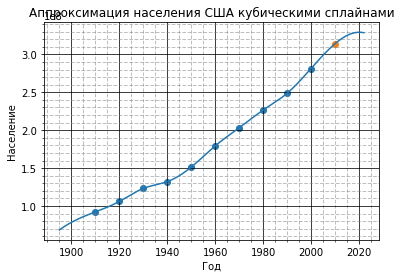

In [70]:
sline_set = SplineSet(year, population)

x, y = sline_set.Spline3D(np.array(range(1895, 2023)))

plt.scatter(year, population)
plt.plot(x, y)

if 2010 in x:
  plt.scatter(target_year, y[list(x).index(target_year)])
  print('='*50)
  print('Approximated population in 2010 is %d' %y[list(x).index(target_year)])
  print('='*50)

plt.minorticks_on()
plt.grid(which = 'major', color = 'black', linewidth = 1, linestyle = '-', alpha = 0.75)
plt.grid(which = 'minor', color = 'grey', linewidth = 1, linestyle = '--', alpha = 0.5)

plt.title('Аппроксимация населения США кубическими сплайнами')
plt.xlabel('Год')
plt.ylabel('Население')

#### Вывод
При приближении кубическими сплайнами, интерполяция дает более адекватное значение. Такое различие результатов объясняется особенностями интерполяционных методов. Поскольку при интерполяции сплайнами мы имеем условие на производные первого и второго порядков на концах диапазона, интерполируемая функция не улетает на концах в область больишх значений.

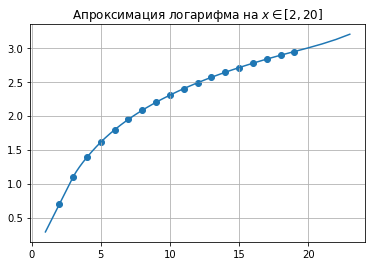

In [71]:
# пример аппроксимации простой функции кубическими сплайнами
x = np.array(range(2, 20))
y = np.log(x)

spline_set = SplineSet(x, y)
x1, y1 = spline_set.Spline3D(np.array(range(min(x)-1, max(x)+5)))

plt.scatter(x, y)
plt.plot(x1, y1)
plt.title(r'Апроксимация логарифма на $x \in [2, 20]$')
plt.grid()